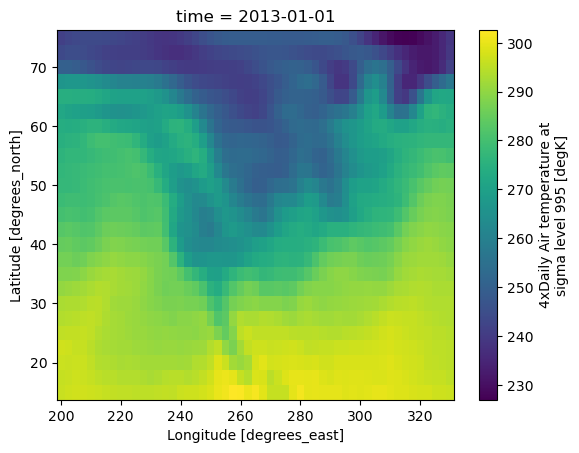

In [1]:
#load example dataset
import numpy as np
import xarray as xr
xr.set_options(keep_attrs=True, display_expand_data =False)
da = xr.tutorial.load_dataset("air_temperature", engine="netcdf4").air
monthly = da.resample(time="M").mean()
data = da.isel(time=0)
data.plot()

In [2]:
data

<xarray.DataArray 'air' (lat: 25, lon: 53)>
241.2 242.5 243.5 244.0 244.1 243.9 ... 298.0 297.8 297.6 296.9 296.8 296.6
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [3]:
data[10,:]

<xarray.DataArray 'air' (lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 280.5 282.9 284.7 286.1 286.9 286.6
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [4]:
data.sel(lat=50)

<xarray.DataArray 'air' (lon: 53)>
277.3 277.4 277.8 278.6 279.5 280.1 ... 280.5 282.9 284.7 286.1 286.9 286.6
Coordinates:
    lat      float32 50.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

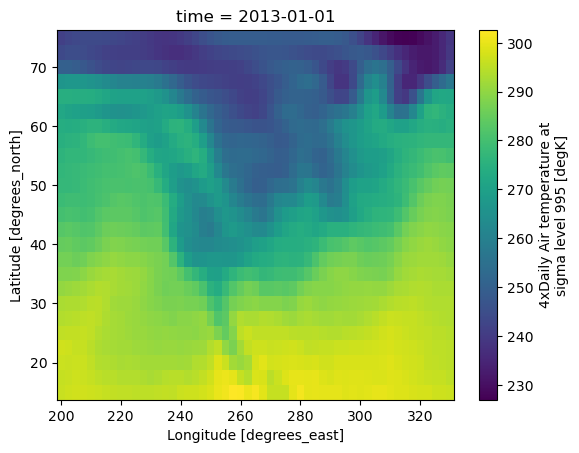

In [5]:
data.plot()

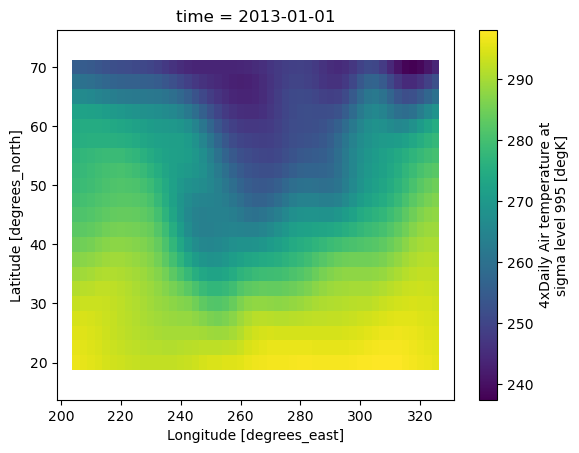

In [8]:
#plot in a smoother way
data.rolling(lat=5,lon=5,center=True).mean().plot()

# reduce method
the reduce method excepts a function that can recieve and return plain arrays(e.g numpy). the map method excepts a function that can recieve and return Xarray objects

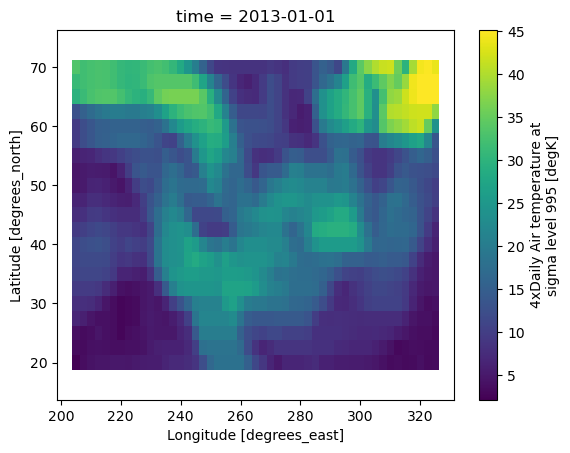

In [10]:
data.rolling(lat=5,lon=5,center=True).reduce(np.ptp).plot()

# for more complicated analysis, construct a new array with a new dimention:
Allow things like short-time fourier transform, spectrogram, windowed rolling  etc

In [12]:
simple = xr.DataArray(np.arange(10), dims="time", coords={"time":np.arange(10)})
simple

<xarray.DataArray (time: 10)>
0 1 2 3 4 5 6 7 8 9
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

In [13]:
# add a new dimension "window"
simple.rolling(time=5, center=True).construct("window")

<xarray.DataArray (time: 10, window: 5)>
nan nan 0.0 1.0 2.0 nan 0.0 1.0 2.0 3.0 ... 7.0 8.0 9.0 nan 7.0 8.0 9.0 nan nan
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: window

In [14]:
#calculate 5 point running mean in time using rolling.construct
simple.rolling(time=5,center=True).construct("window").mean("window")

<xarray.DataArray (time: 10)>
1.0 1.5 2.0 3.0 4.0 5.0 6.0 7.0 7.5 8.0
Coordinates:
  * time     (time) int64 0 1 2 3 4 5 6 7 8 9

# Advanced: Another construct example
This is a 2d rolling example we need to provide two new dimensions name

In [ ]:
data.rolling(lat=5,lon=5, center=True).construct("window").mean("window")

In [15]:
month = xr.DataArray(np.tile(np.arange(1,13),reps=2), dims="time",coords={"time":np.arange(1,25)})
month

<xarray.DataArray (time: 24)>
1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12
Coordinates:
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 ... 15 16 17 18 19 20 21 22 23 24

In [16]:
#break tieme into two new dimensions "year", "month"
month.coarsen(time=12).construct(time=("year","month"))

<xarray.DataArray (year: 2, month: 12)>
1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 12
Coordinates:
    time     (year, month) int64 1 2 3 4 5 6 7 8 9 ... 17 18 19 20 21 22 23 24
Dimensions without coordinates: year, month

In [20]:
month.isel(time = slice(1,None)).coarsen(time=12,boundary="pad").construct(time=("year","month"))

<xarray.DataArray (year: 2, month: 12)>
2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 ... 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0 nan
Coordinates:
    time     (year, month) float64 2.0 3.0 4.0 5.0 6.0 ... 22.0 23.0 24.0 nan
Dimensions without coordinates: year, month

In [23]:
month.isel(time = slice(1,None)).pad(time=(1,0))

<xarray.DataArray (time: 24)>
nan 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 ... 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 12.0
Coordinates:
  * time     (time) float64 nan 2.0 3.0 4.0 5.0 6.0 ... 20.0 21.0 22.0 23.0 24.0

In [ ]:
month.isel(time= slice(1,None)).pad(time=(1,0), fill_value={"time":}.coarsen(time=12).construct(time=("year","month"))